# WeatherPy

---


In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=imperial&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | san antonio oeste
Processing Record 5 of Set 1 | nagqu
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | aykhal
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | hayma'
City not found. Skipping...
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | benghazi
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | aasiaat
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | radenci
Processing Record 19 of Set 1 | san antonio de pale
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of 

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,42.46,70,40,19.57,AR,1728172138
1,edinburgh of the seven seas,-37.0676,-12.3116,54.01,89,100,23.22,SH,1728172139
2,petropavlovsk-kamchatsky,53.0452,158.6483,48.79,43,0,2.24,RU,1728172030
3,san antonio oeste,-40.7319,-64.9477,57.69,45,28,11.79,AR,1728172145
4,nagqu,31.5000,92.0000,35.71,82,82,1.50,CN,1728172147
...,...,...,...,...,...,...,...,...,...
537,santa ines,-3.6667,-45.3800,81.09,70,60,9.17,BR,1728173093
538,makueni boma,-1.8041,37.6203,61.90,87,76,3.11,KE,1728173095
539,ghanzi,-21.5667,21.7833,56.98,34,1,9.42,BW,1728173096
540,kayar,14.9192,-17.1211,79.75,87,39,6.80,SN,1728173098


In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,42.46,70,40,19.57,AR,1728172138
1,edinburgh of the seven seas,-37.0676,-12.3116,54.01,89,100,23.22,SH,1728172139
2,petropavlovsk-kamchatsky,53.0452,158.6483,48.79,43,0,2.24,RU,1728172030
3,san antonio oeste,-40.7319,-64.9477,57.69,45,28,11.79,AR,1728172145
4,nagqu,31.5000,92.0000,35.71,82,82,1.50,CN,1728172147


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,42.46,70,40,19.57,AR,1728172138
1,edinburgh of the seven seas,-37.0676,-12.3116,54.01,89,100,23.22,SH,1728172139
2,petropavlovsk-kamchatsky,53.0452,158.6483,48.79,43,0,2.24,RU,1728172030
3,san antonio oeste,-40.7319,-64.9477,57.69,45,28,11.79,AR,1728172145
4,nagqu,31.5000,92.0000,35.71,82,82,1.50,CN,1728172147


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

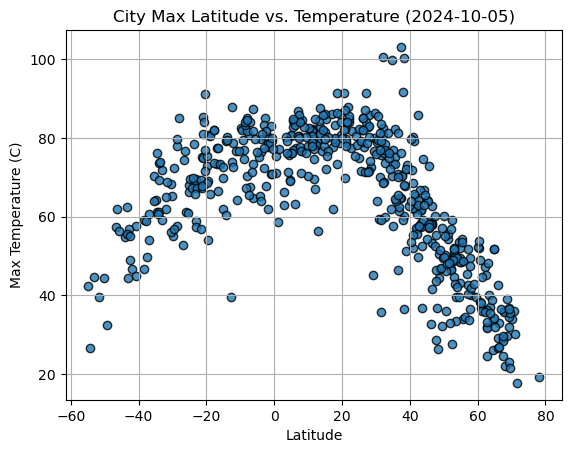

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

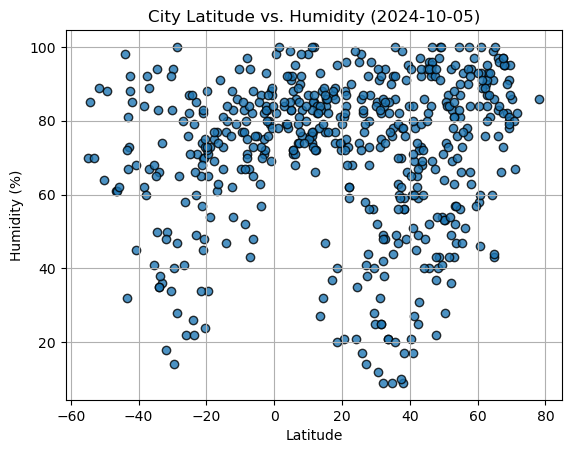

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

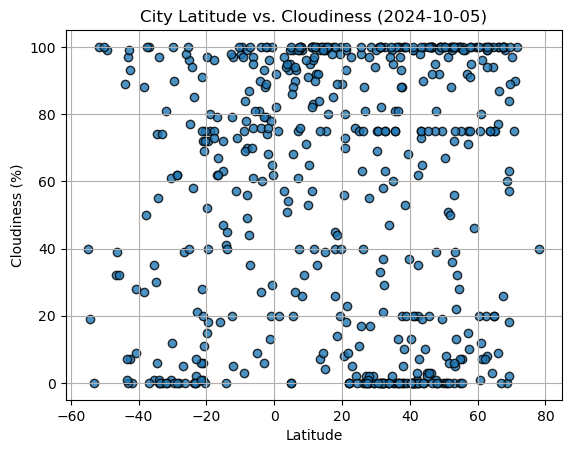

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

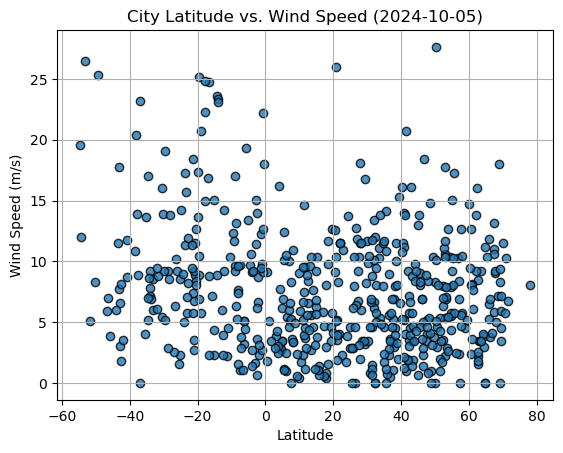

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    print(f"The r-value is: {rvalue**2}")
    # Generate plots     
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{x_label} vs {y_label}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
# Show the plot
    plt.show()
    

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,petropavlovsk-kamchatsky,53.0452,158.6483,48.79,43,0,2.24,RU,1728172030
4,nagqu,31.5000,92.0000,35.71,82,82,1.50,CN,1728172147
5,ust-nera,64.5667,143.2000,26.06,91,94,3.85,RU,1728172149
6,aykhal,66.0000,111.5000,26.74,97,100,5.23,RU,1728172151
11,benghazi,32.1167,20.0667,80.83,49,58,6.64,LY,1728172160


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,42.46,70,40,19.57,AR,1728172138
1,edinburgh of the seven seas,-37.0676,-12.3116,54.01,89,100,23.22,SH,1728172139
3,san antonio oeste,-40.7319,-64.9477,57.69,45,28,11.79,AR,1728172145
7,port-aux-francais,-49.3500,70.2167,32.45,88,99,25.28,TF,1728172152
8,grytviken,-54.2811,-36.5092,26.56,85,19,12.03,GS,1728172155


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6804054216207928


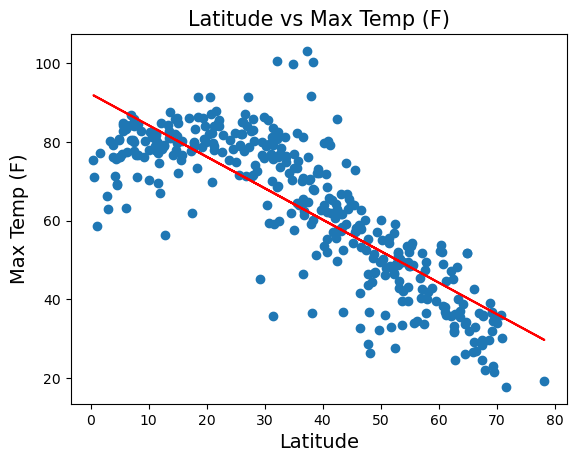

In [64]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function with all required arguments
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))


The r-value is: 0.5014937539914361


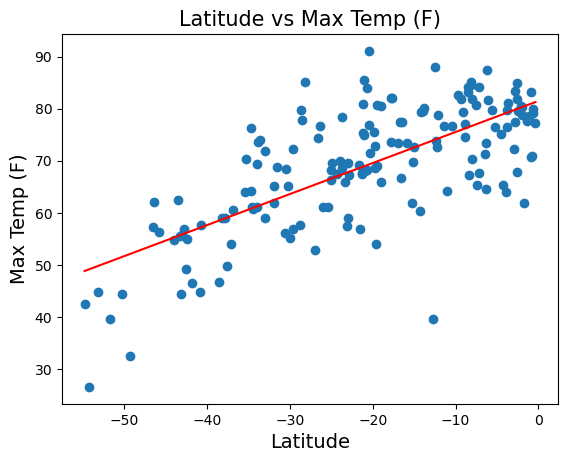

In [74]:
# Linear regression on Southern Hemisphere
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-50,70))

**Discussion about the linear relationship:** Both charts are showing the corrlation between latitude and temperature. The closer you move
to the equator, the higher the temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 4.623014789105094e-05


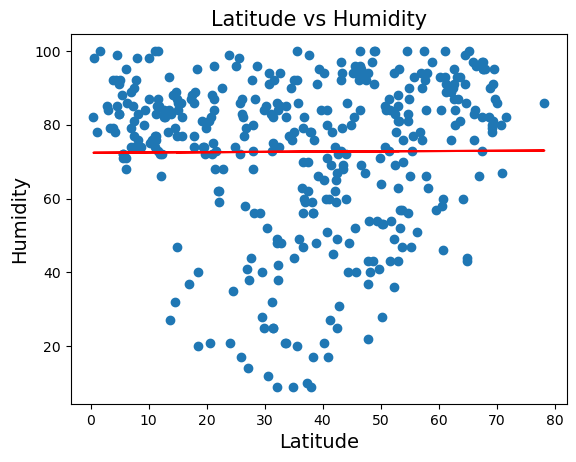

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Northern",(50,50))

The r-value is: 0.04232135149389066


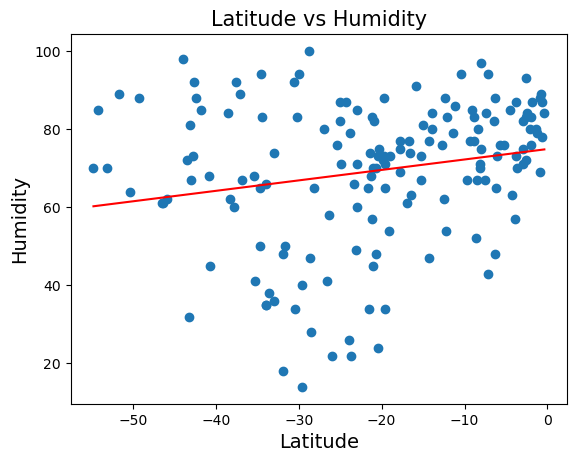

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Southern",(50, 50))

**Discussion about the linear relationship:** There seems to be no correlation between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.004688478139569905


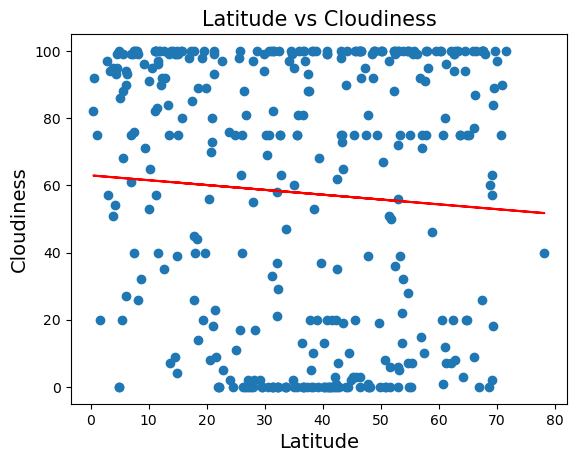

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (20, 60))

The r-value is: 0.07796383450943582


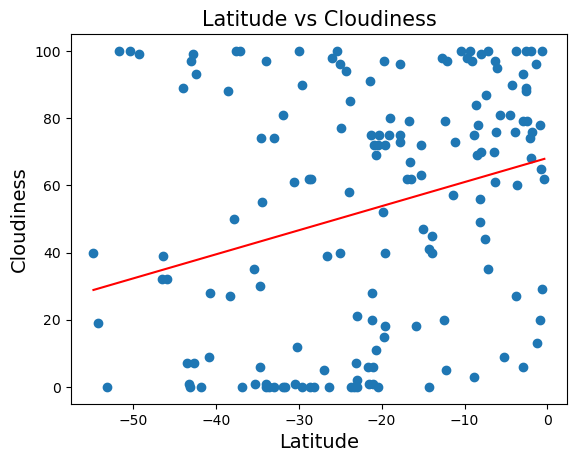

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern",(-45, 60))

**Discussion about the linear relationship:** There is very little correlation in the Northern Hemisphere. The Southern Hemisphere
has more of a correlation the closer to the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01385159296838986


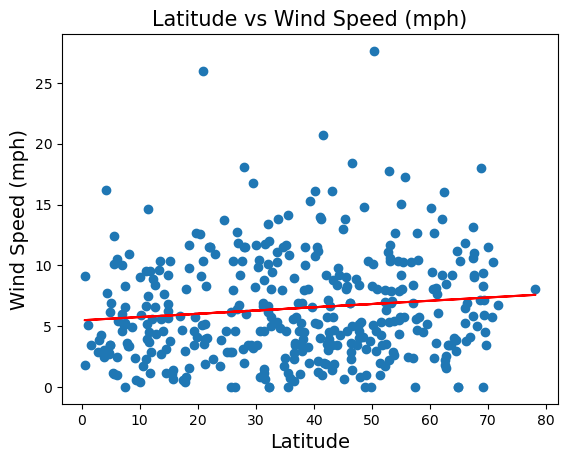

In [83]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 40))

The r-value is: 0.010540276800589369


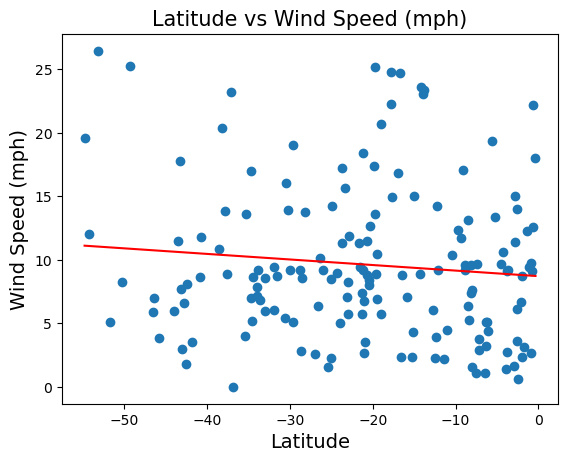

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25))

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed. 